In [1]:
import numpy as np
import scipy.constants as phy_const
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pickle
import math
import os
import pandas as pd
import glob
import sys
import configparser

import MakePlots_Charoy as mplt_mod


/home/mguillon/Documents/Stage_LPP/Codes/FLHET1D_alvarez_implicitheatf/MakePlots_Charoy.py:410: SyntaxWarning: invalid escape sequence '\G'
  ax[3].plot(time*1000., CurrentDensity*A0, label='$I_d = A_0 e (\Gamma_i - \Gamma_e)$')
/home/mguillon/Documents/Stage_LPP/Codes/FLHET1D_alvarez_implicitheatf/MakePlots_Charoy.py:461: SyntaxWarning: invalid escape sequence '\m'
  title = 'time = '+ str(round(t/1e-6, 4))+'$\mu$s'


In [2]:
dirname = os.getcwd()

## Test the programation of the magnetic field

Implemented in FLHET_compiled.py the magnetic field as it is in Thomas'S Charoy thesis:

$$
B(x) = a_k \exp{( -\frac{(x - x_{Bmax})^2}{2 \sigma_k^2} )} + b_k
$$
With $k = 1$ for $x \leq x_{Bmax}$ and $k = 2$ for $x > x_{Bmax}$.

In the script, the $a_k, b_k$ are calculated as function of input parameters which are:

* $B_{max}$, the maximum amplitude of the magnetic field, reached at $x = x_{Bmax}$.

* $B_{0}$, the magnetic field at $x = 0$.

* $B_{Lx}$, the magnetic field at $x = L_x$.

* The $\sigma_k$, lengthscales of B variation.

With these previous quantities:
$$ a_1 = \frac{B_{max} - B_0}{1 - \exp{(-\frac{x_{Bmax}^2}{2 \sigma_1^2})}} $$
$$ a_2 = \frac{B_{max} - B_{Lx}}{1 - \exp{(-\frac{(L_x - x_{Bmax})^2}{2 \sigma_2^2})}} $$
$$ b_1 = B_{max} - a_1 $$
$$ b_2 = B_{max} - a_2 $$


In [3]:
LX  = 0.0250
LTHR= 0.0075

In [4]:
BMAX= 10e-3 # Max Mag field
B0  = 6e-3  # Mag field at x=0
BLX = 1e-3  # Mag field at x=LX
LB1 = 0.25*LX  # Length for magnetic field
LB2 = 0.25*LX  # Length for magnetic field

In [5]:
NBPOINTS = 200
Delta_x = LX / NBPOINTS

In [6]:
x_center = np.linspace(Delta_x, LX - Delta_x, NBPOINTS)  # Mesh in the center of cell

In [7]:
a1 = (BMAX - B0)/(1 - math.exp(-LTHR**2/(2*LB1**2)))
a2 = (BMAX - BLX)/(1 - math.exp(-(LX - LTHR)**2/(2*LB2**2)))
b1 = BMAX - a1
b2 = BMAX - a2
Barr1 = a1*np.exp(-(x_center - LTHR)**2/(2*LB1**2)) + b1
Barr2 = a2*np.exp(-(x_center - LTHR)**2/(2*LB2**2)) + b2    # Magnetic field outside the thruster

Barr = np.where(x_center <= LTHR, Barr1, Barr2)

In [8]:
code_B100 = np.copy(Barr)
code_B050 = 0.5 * Barr
code_B150 = 1.5 * Barr
code_B200 = 2.0 * Barr

In [9]:
# imports Charoy's plot data
def conv(text):
    textstr = str(text)
    textstr.replace(',','.')

    try:
        f = float(textstr)
    except:
        return float('nan')
    else:
        return f

charoy_B050 = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/B_max050.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")
charoy_B100 = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/B_max100.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";") 
charoy_B150 = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/B_max150.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")
charoy_B200 = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/B_max200.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";") 


In [10]:
charoy_B100

array([[2.21978156e-02, 6.19036608e+01],
       [5.61570847e-02, 6.44214058e+01],
       [9.01158234e-02, 6.69624632e+01],
       [1.24075093e-01, 6.94802081e+01],
       [1.58034362e-01, 7.19979531e+01],
       [1.91992570e-01, 7.45623229e+01],
       [2.25951309e-01, 7.71033803e+01],
       [2.59911108e-01, 7.95978128e+01],
       [2.93873030e-01, 8.19989955e+01],
       [3.26291502e-01, 8.42789534e+01],
       [3.71069341e-01, 8.70111729e+01],
       [4.05036036e-01, 8.92025435e+01],
       [4.39009627e-01, 9.10908522e+01],
       [4.72985870e-01, 9.28625987e+01],
       [5.06965826e-01, 9.44711579e+01],
       [5.40950556e-01, 9.58699051e+01],
       [5.74938999e-01, 9.71054652e+01],
       [6.08932746e-01, 9.81079006e+01],
       [6.42930736e-01, 9.89238365e+01],
       [6.76934031e-01, 9.95066478e+01],
       [7.10945813e-01, 9.97164599e+01],
       [7.44955473e-01, 1.00019522e+02],
       [7.78978925e-01, 9.97164599e+01],
       [8.13000785e-01, 9.94833354e+01],
       [8.470321

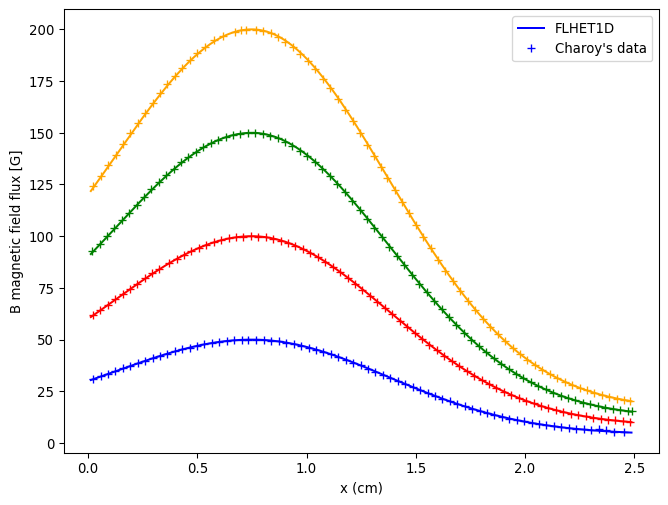

In [11]:
fig = plt.figure(figsize=(8,6), dpi=96)

plt.plot(x_center*100, code_B050*10000, 'b-', label='FLHET1D')
plt.plot(x_center*100, code_B100*10000, 'r-',)
plt.plot(x_center*100, code_B150*10000, 'g-')
plt.plot(x_center*100, code_B200*10000, '-', color='orange')

plt.plot(charoy_B050[:,0], charoy_B050[:,1], 'b+', label="Charoy's data")
plt.plot(charoy_B100[:,0], charoy_B100[:,1], 'r+')
plt.plot(charoy_B150[:,0], charoy_B150[:,1], 'g+')
plt.plot(charoy_B200[:,0], charoy_B200[:,1], '+', color= 'orange')

plt.xlabel("x (cm)")
plt.ylabel("B magnetic field flux [G]")
plt.legend()
plt.show()

## Test the ionization process

Implemented in FLHET_compiled.py the ionization profile as it is in Thomas'S Charoy thesis:

$$
S(x) = S_0 \cos{(\pi \frac{x - x_m}{x_2 - x_1})}
$$
For $x \in [x_1, x_2]$, and $S(x) = 0$ elsewhere.

With $x_m = \frac{x_1 + x_2}{2}$.


In [12]:
SIZMAX = 5.2e23
LSIZ1 = 0.0025
LSIZ2 = 0.0100

In [13]:
xm = (LSIZ1 + LSIZ2)/2
Siz_arr = SIZMAX*np.cos(math.pi*(x_center - xm)/(LSIZ2 - LSIZ1))
Siz_arr = np.where((x_center < LSIZ1)|(x_center > LSIZ2), 0., Siz_arr)

In [14]:
# imports Charoy's plot data
datacharoy = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/S_iz.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";") 

In [15]:
datacharoy

array([[ 2.41138626e-02, -7.55600570e-05],
       [ 5.62398947e-02, -1.01459823e-04],
       [ 9.20694682e-02, -7.21192669e-05],
       [ 1.15236152e-01, -7.09462702e-05],
       [ 1.60025074e-01, -6.86784767e-05],
       [ 1.84736203e-01, -6.74272803e-05],
       [ 2.31068149e-01, -4.00573586e-05],
       [ 2.47578402e-01, -1.27732659e-05],
       [ 2.55715452e-01,  1.08453362e-03],
       [ 2.63334147e-01,  2.90710974e-03],
       [ 2.72261023e-01,  5.00481130e-03],
       [ 2.78591575e-01,  6.19958099e-03],
       [ 2.89266040e-01,  8.60524071e-03],
       [ 2.99946630e-01,  1.09030890e-02],
       [ 3.06044258e-01,  1.23141258e-02],
       [ 3.14979048e-01,  1.42725572e-02],
       [ 3.22840292e-01,  1.57094401e-02],
       [ 3.28910394e-01,  1.76049402e-02],
       [ 3.35579444e-01,  2.10399609e-02],
       [ 3.38103950e-01,  1.88922649e-02],
       [ 3.56916191e-01,  2.17510476e-02],
       [ 3.60983836e-01,  2.39410770e-02],
       [ 3.68632361e-01,  2.52386459e-02],
       [ 3.

In [16]:
x_charoy = datacharoy[:, 0]
S_charoy = datacharoy[:, 1]

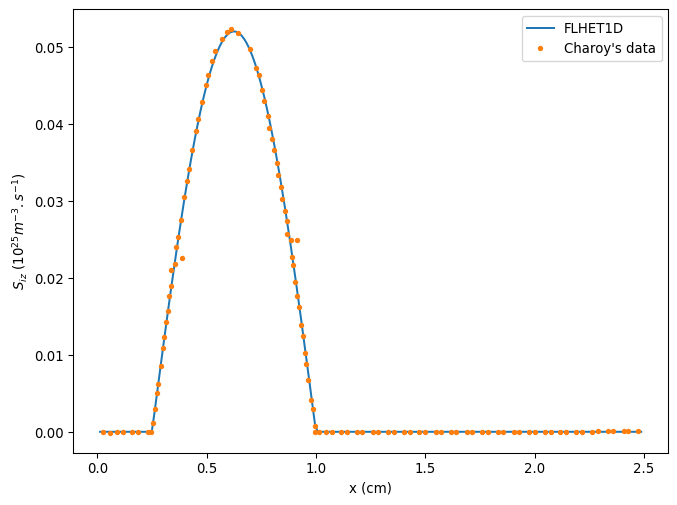

In [17]:
fig = plt.figure(figsize=(8,6), dpi=96)
plt.plot(x_center*100, Siz_arr/(1e25), label='FLHET1D')
plt.plot(x_charoy, S_charoy, marker='.', linestyle='', label="Charoy's data")
plt.xlabel("x (cm)")
plt.ylabel("$S_{iz}$ ($10^{25} m^{-3}.s^{-1}$)")
plt.legend()
plt.show()

## Comparison between simulation results to Charoy's

In [18]:
RESULTSDIR = './Results/charoy_checkcase_0_N400_no_hflux_no_coll/'
configFile = RESULTSDIR+'/Configuration.cfg'

In [19]:
config = configparser.ConfigParser()
config.read(configFile)

physicalParameters = config["Physical Parameters"]


VG = float(physicalParameters["Gas velocity"])  # Gas velocity
Mi = float(physicalParameters["Ion Mass"]) * phy_const.m_u  # Ion Mass
me = phy_const.m_e  # Electron mass
R1 = float(physicalParameters["Inner radius"])  # Inner radius of the thruster
R2 = float(physicalParameters["Outer radius"])  # Outer radius of the thruster
A0 = np.pi * (R2**2 - R1**2)  # Area of the thruster
LX = float(physicalParameters["Length of axis"])  # length of Axis of the simulation
LTHR = float(
    physicalParameters["Length of thruster"]
)  # length of thruster (position of B_max)
alpha_B1 = float(
    physicalParameters["Anomalous transport alpha_B1"]
)  # Anomalous transport
alpha_B2 = float(
    physicalParameters["Anomalous transport alpha_B2"]
)  # Anomalous transport
MDOT = float(physicalParameters["Mass flow"])  # Mass flow rate of propellant
Te_Cath = float(
    physicalParameters["e- Temperature Cathode"]
)  # Electron temperature at the cathode
TE0 = float(physicalParameters["Initial e- temperature"]) # Initial electron temperature at the cathode.
NI0 = float(physicalParameters["Initial plasma density"]) # Initial plasma density.
#NG0 = float(physicalParameters["Initial neutrals density"]) # Initial neutrals density. No need for this parameter it is processed to have be coehrent with MDOT, AO and VG.
Rext = float(physicalParameters["Ballast resistor"])  # Resistor of the ballast
V = float(physicalParameters["Voltage"])  # Potential difference
Circuit = bool(
    config.getboolean("Physical Parameters", "Circuit", fallback=False)
)  # RLC Circuit
HEATFLUX = bool(
    config.getboolean("Physical Parameters", "Electron heat flux", fallback=False)
)


# Magnetic field configuration
MagneticFieldConfig = config["Magnetic field configuration"]

if MagneticFieldConfig["Type"] == "Default":
    print(MagneticFieldConfig["Type"] + " Magnetic Field")

    BMAX = float(MagneticFieldConfig["Max B-field"])  # Max Mag field
    B0 = float(MagneticFieldConfig["B-field at 0"])  # Mag field at x=0
    BLX = float(MagneticFieldConfig["B-field at LX"])  # Mag field at x=LX
    LB1 = float(MagneticFieldConfig["Length B-field 1"])  # Length for magnetic field
    LB2 = float(MagneticFieldConfig["Length B-field 2"])  # Length for magnetic field
    saveBField = bool(MagneticFieldConfig["Save B-field"])


# Ionization source term configuration
IonizationConfig = config["Ionization configuration"]
isSourceImposed = bool(
    config.getboolean("Ionization configuration", "source is imposed", fallback=False)
)
if isSourceImposed:
    print("The ionization source term is imposed as specified in T.Charoy's thesis, section 2.2.2.")
SIZMAX  = float(IonizationConfig["Maximum S_iz value"])  # Max Mag field
LSIZ1   = float(IonizationConfig["Position of 1st S_iz zero"])  # Mag field at x=0
LSIZ2   = float(IonizationConfig["Position of 2nd S_iz zero"])  # Mag field at x=LX
assert(LSIZ2 >= LSIZ1)

# Collisions parameters
CollisionsConfig = config["Collisions"]
areThereIonizationColl = bool(
    config.getboolean("Collisions", "enable ionization coll.", fallback=False)
)    
KEL = float(CollisionsConfig["Elastic collisions reaction rate"])

# Wall interactions
WallInteractionConfig = config["Wall interactions"]
ESTAR = float(WallInteractionConfig["Crossover energy"])  # Crossover energy
assert((WallInteractionConfig["Type"] == "Default")|(WallInteractionConfig["Type"] == "None"))

##########################################################
#           NUMERICAL PARAMETERS
##########################################################
NumericsConfig = config["Numerical Parameteres"]

NBPOINTS = int(NumericsConfig["Number of points"])  # Number of cells
SAVERATE = int(NumericsConfig["Save rate"])  # Rate at which we store the data
CFL = float(NumericsConfig["CFL"])  # Nondimensional size of the time step
TIMEFINAL = float(NumericsConfig["Final time"])  # Last time of simulation
Results = NumericsConfig["Result dir"]  # Name of result directory
TIMESCHEME = NumericsConfig["Time integration"]  # Time integration scheme
IMPlICIT   = bool(
    config.getboolean("Numerical Parameteres", "Implicit heat flux", fallback=False) ) # Time integration scheme for heat flux equation
MESHREFINEMENT =  bool(
    config.getboolean("Numerical Parameteres", "Mesh refinement", fallback=False) )
if MESHREFINEMENT:
    MESHLEVELS = int(NumericsConfig["Mesh levels"])
    REFINEMENTLENGTH = float(NumericsConfig["Refinement length"])



##########################################################
#           Allocation of large vectors                  #
##########################################################

Delta_t = 1.0  # Initialization of Delta_t (do not change)
# Delta_x = LX / NBPOINTS

x_mesh = np.linspace(0, LX, NBPOINTS + 1)  # Mesh in the interface
if MESHREFINEMENT:
    # get the point below the refinement length
    Dx_notRefined = x_mesh[1]
    #First level
    i_refinement = int(np.floor(REFINEMENTLENGTH/Dx_notRefined))
    mesh_level_im1 = np.linspace(0, x_mesh[i_refinement], i_refinement*2 + 1)
    mesh_refinedim1 = np.concatenate((mesh_level_im1[:-1], x_mesh[i_refinement:]))
    # plt.plot(x_mesh, np.zeros_like(x_mesh), linestyle='None', marker='o', markersize=2)
    # plt.plot(mesh_refinedim1, np.ones_like(mesh_refinedim1), linestyle='None', marker='o', markersize=2)

    #Secondand rest of levels level
    if MESHLEVELS > 1:
        for i_level in range(2, MESHLEVELS + 1):
            i_refinement_level   = int((np.shape(mesh_level_im1)[0] - 1)/2)
            mesh_level_i         = np.linspace(0, mesh_level_im1[i_refinement_level], i_refinement_level*2 + 1)
            mesh_refined_level_i = np.concatenate((mesh_level_i[:-1], mesh_refinedim1[i_refinement_level:]))

            mesh_level_im1      = mesh_level_i
            mesh_refinedim1     = mesh_refined_level_i
            # plt.plot(mesh_refined_level_i, np.ones_like(mesh_refined_level_i)*i_level, linestyle='None', marker='o', markersize=2)
        x_mesh = np.copy(mesh_refined_level_i)

# x_center = np.linspace(0.5*Delta_x, LX - 0.5*Delta_x, NBPOINTS)  # Mesh in the center of cell
x_center = (x_mesh[1:] + x_mesh[:-1])/2
Delta_x  =  x_mesh[1:] - x_mesh[:-1]
NBPOINTS = np.shape(x_center)[0]
# We create an array that also include the position of the ghost cells
x_center_extended = np.insert(x_center, 0, -x_center[0])
x_center_extended = np.append(x_center_extended, x_center[-1] + Delta_x[-1])
Delta_x_extended  = np.insert(Delta_x, 0, Delta_x[0])
Delta_x_extended  = np.append(Delta_x_extended, Delta_x[-1])    

alpha_B = (np.ones(NBPOINTS) * alpha_B1)  # Anomalous transport coefficient inside the thruster
alpha_B = np.where(x_center < LTHR, alpha_B, alpha_B2)  # Anomalous transport coefficient in the plume
alpha_B_smooth = np.copy(alpha_B)

# smooth between alpha_B1 and alpha_B2
nsmooth_o2 = NBPOINTS//10
for index in range(nsmooth_o2, NBPOINTS - (nsmooth_o2-1)):
    alpha_B_smooth[index] = np.mean(alpha_B[index-nsmooth_o2:index+nsmooth_o2])
alpha_B = alpha_B_smooth



Default Magnetic Field
The ionization source term is imposed as specified in T.Charoy's thesis, section 2.2.2.


In [20]:
##########################################################
#           Make the plots
##########################################################


plt.style.use('classic')
plt.rcParams["font.weight"] = 'normal'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 2

ResultsFigs = RESULTSDIR+"/Figs_vs_Charoy"
ResultsData = RESULTSDIR+"/Data"

if not os.path.exists(ResultsFigs):
    os.makedirs(ResultsFigs)


In [21]:
# open all the files in the directory and sort them to do the video in order
files       = glob.glob(ResultsData + "/*.pkl")
filesSorted = sorted(files, key = lambda x: os.path.getmtime(x), reverse=True)
files.sort(key=os.path.getmtime)


Current = np.zeros(np.shape(files)[0])
Voltage = np.zeros(np.shape(files)[0])
time    = np.zeros(np.shape(files)[0])

# Open single file

In [22]:
#####################################
#           Plot variables
#####################################

i_save = -1
file = files[i_save]
with open(file, 'rb') as f:
    [t, P, U, P_Inlet, P_Outlet, J, V, B, x_center] = pickle.load(f)

# Save the current
Current[i_save] = J
Voltage[i_save] = V
time[i_save]    = t

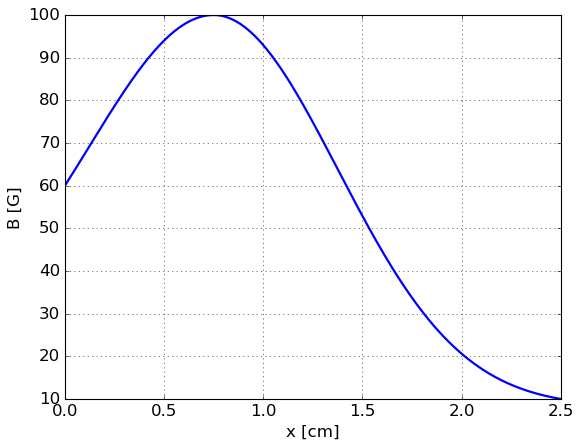

In [23]:
f, ax = plt.subplots()
ax.plot(x_center*100, B*1e4)
ax.set_ylabel('B [G]')
ax.set_xlabel('x [cm]')
ax.grid(True)

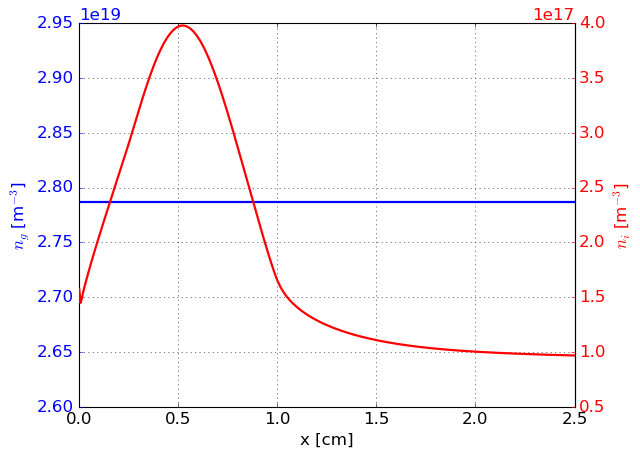

In [24]:
f, ax = plt.subplots()

ax_n_i=ax.twinx()

ax.plot(x_center*100, P[0,:])

ax_n_i.plot(x_center*100, P[1,:], 'r')

ax_n_i.set_frame_on(True)
ax_n_i.patch.set_visible(False)

plt.setp(ax_n_i.spines.values(), visible=False)
ax_n_i.spines["right"].set_visible(True)



ax.set_ylabel('$n_g$ [m$^{-3}$]')
ax_n_i.set_ylabel('$n_i$ [m$^{-3}$]')

ax.set_xlabel('x [cm]')

ax.yaxis.label.set_color('b')
ax.tick_params(axis='y', colors='b')

ax_n_i.yaxis.label.set_color('r')
ax_n_i.tick_params(axis='y', colors='r')

ax.grid(True)

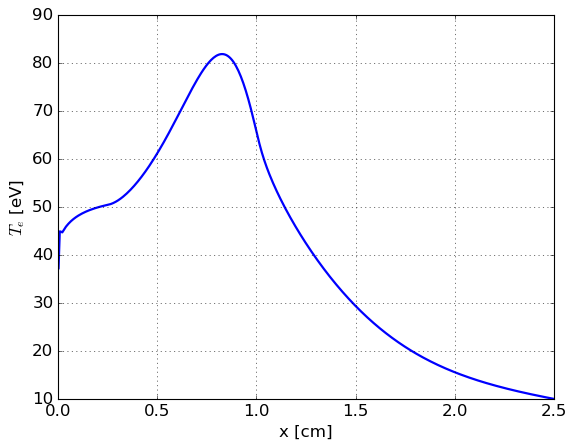

In [25]:
f, ax = plt.subplots()

ax.plot(x_center*100, P[3,:])

ax.set_ylabel('$T_e$ [eV]')
ax.set_xlabel('x [cm]')

ax.grid(True)

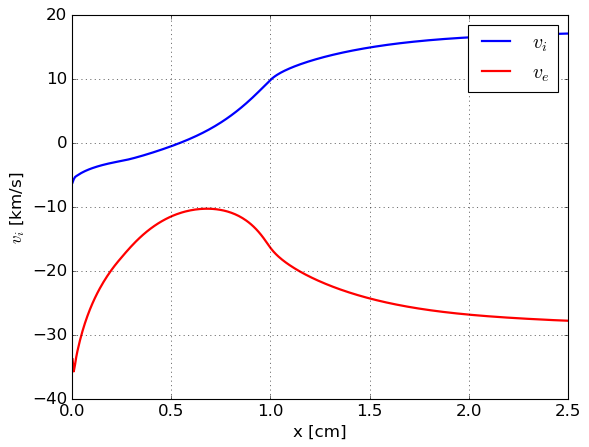

In [26]:
f, ax = plt.subplots()

ax.plot(x_center*100, P[2,:]/1000, label="$v_i$")

ax.plot(x_center*100, P[4,:]/1000, 'r', label="$v_e$")

ax.set_ylabel('$v_i$ [km/s]')
ax.set_xlabel('x [cm]')

ax.legend()
ax.grid(True)

# Open single file and Comparison with Charoy digitized plots.

In [27]:
# Collecting data from Charoy's thesis. These are digitized data from screen of figures. Made with WebPlotDigitizer.
Ex_charoy = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/Ex_B100.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")
ni_charoy = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/ni_B100.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")

In [28]:
Ex_charoy

array([[ 0.10857, -0.00804],
       [ 0.14933,  0.01345],
       [ 0.19009,  0.03241],
       [ 0.22666,  0.0619 ],
       [ 0.27181, -0.02359],
       [ 0.31283, -0.13043],
       [ 0.35169, -0.08901],
       [ 0.3979 , -0.01201],
       [ 0.43845,  0.11935],
       [ 0.47706,  0.28594],
       [ 0.50821,  0.47943],
       [ 0.53192,  0.67914],
       [ 0.55189,  0.89793],
       [ 0.56815,  1.11323],
       [ 0.58255,  1.33222],
       [ 0.59803,  1.5692 ],
       [ 0.61239,  1.80895],
       [ 0.62748,  2.05608],
       [ 0.64   ,  2.28662],
       [ 0.65438,  2.51715],
       [ 0.66876,  2.74768],
       [ 0.68557,  2.99664],
       [ 0.69859,  3.22902],
       [ 0.71184,  3.46694],
       [ 0.72622,  3.69747],
       [ 0.74069,  3.88417],
       [ 0.75877,  4.1139 ],
       [ 0.78394,  4.5181 ],
       [ 0.80209,  4.7163 ],
       [ 0.82759,  4.9502 ],
       [ 0.86258,  5.07185],
       [ 0.90356,  4.98766],
       [ 0.93547,  4.7952 ],
       [ 0.95443,  4.58594],
       [ 0.967

In [29]:
def cumTrapz_from_custom_x(y, x):
    assert(x.shape == y.shape)
    cuminteg = np.zeros(y.shape, dtype=float)
    n = y.shape[0]
    for i in range(1, n):
        d = x[i] - x[i-1]
        cuminteg[i] = cuminteg[i-1] + d * (y[i] + y[i-1]) / 2

    return cuminteg

In [30]:
phi_charoy = V - cumTrapz_from_custom_x(Ex_charoy[:, 1]*10000, Ex_charoy[:, 0]/100)

In [31]:
phi_charoy

array([ 2.00000000e+02,  1.99988974e+02,  1.99895512e+02,  1.99723066e+02,
        1.99636581e+02,  1.99952476e+02,  2.00378848e+02,  2.00612255e+02,
        2.00394623e+02,  1.99612211e+02,  1.98420147e+02,  1.97046662e+02,
        1.95471958e+02,  1.93836885e+02,  1.92076161e+02,  1.89830461e+02,
        1.87404950e+02,  1.84488785e+02,  1.81770254e+02,  1.78316344e+02,
        1.74530931e+02,  1.69702830e+02,  1.65649925e+02,  1.61213852e+02,
        1.56062641e+02,  1.50577325e+02,  1.43347069e+02,  1.32483697e+02,
        1.24103479e+02,  1.11778692e+02,  9.42451153e+01,  7.36331793e+01,
        5.80246262e+01,  4.91313055e+01,  4.31245873e+01,  3.72659348e+01,
        3.01451282e+01,  2.47272176e+01,  2.22262939e+01,  2.06246483e+01,
        1.89919940e+01,  1.74286602e+01,  1.56474251e+01,  1.33269682e+01,
        1.09778937e+01,  8.18431595e+00,  6.41008685e+00,  4.98672685e+00,
        3.80717302e+00,  2.75540008e+00,  1.78373480e+00,  9.03732980e-01,
        1.36423040e-01, -

In [32]:
#####################################
#           Plot variables
#####################################

i_save = -1
file = files[i_save]
with open(file, 'rb') as f:
    [t, P, U, P_Inlet, P_Outlet, J, V, B, x_center] = pickle.load(f)

# Save the current
Current[i_save] = J
Voltage[i_save] = V
time[i_save]    = t

In [33]:
Ex_fluid = mplt_mod.compute_E(P, B, ESTAR, WallInteractionConfig["Type"], R1, R2, Mi, x_center, LTHR, KEL, alpha_B, J, A0)
phi_fluid = mplt_mod.compute_phi(Ex_fluid, Delta_x, J, V, Rext)

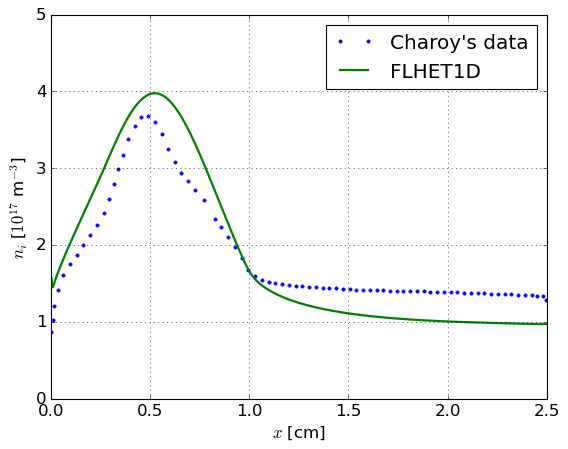

In [39]:
f, ax = plt.subplots()

ax.plot(ni_charoy[:,0], ni_charoy[:,1], '.', label="Charoy's data")
ax.plot(x_center*100, P[1,:]/1e17, '-', label="FLHET1D")
ax.set_ylim([0., 5.0])
ax.set_xlabel("$x$ [cm]")
ax.set_ylabel("$n_i$ [$10^{17}$ m$^{-3}$]")

ax.grid(True)
ax.legend()

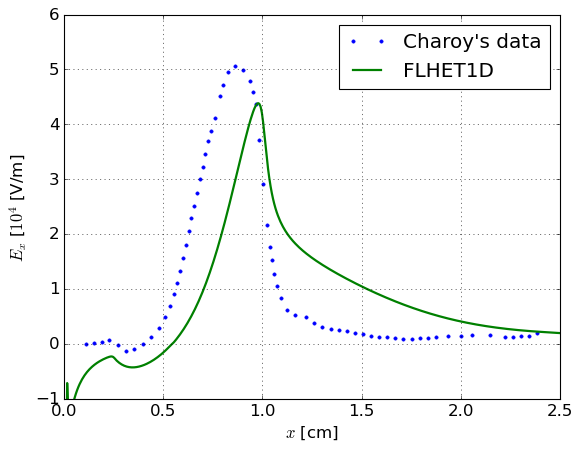

In [40]:
f, ax = plt.subplots()

ax.plot(Ex_charoy[:,0], Ex_charoy[:,1], '.', label="Charoy's data")
ax.plot(x_center*100, Ex_fluid/10000, '-', label="FLHET1D")
ax.set_ylim([-1.0, 6.0])
ax.set_xlabel("$x$ [cm]")
ax.set_ylabel("$E_x$ [$10^{4}$ [V/m]")

ax.grid()
ax.legend()

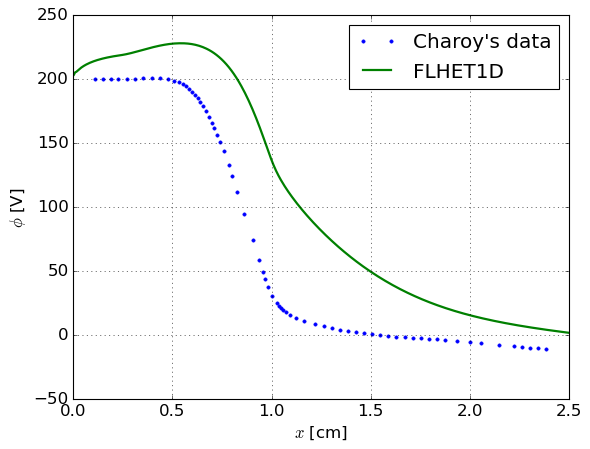

In [36]:
f, ax = plt.subplots()

ax.plot(Ex_charoy[:,0], phi_charoy, '.', label="Charoy's data")
ax.plot(x_center*100, phi_fluid, '-', label="FLHET1D")

ax.set_xlabel("$x$ [cm]")
ax.set_ylabel("$\\phi$ [V]")

ax.grid()
ax.legend()

Comparison of electronic temperature. Warning: the data from Charoy's thesis with regard to $T_e$ is not from the 4th Chapter, because he does not display this curve. But since B=100 G and J = 400 A $m^{-2}$ is the nominal case of 3rd Chapter benchmark, I took $T_e$ from Figure 3.7 (LPP's curve).

In [37]:
Te_benchmark = np.loadtxt(dirname+"/Results_to_share/plot_digitizer_from_Charoy/Te_from_benchmark.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";")

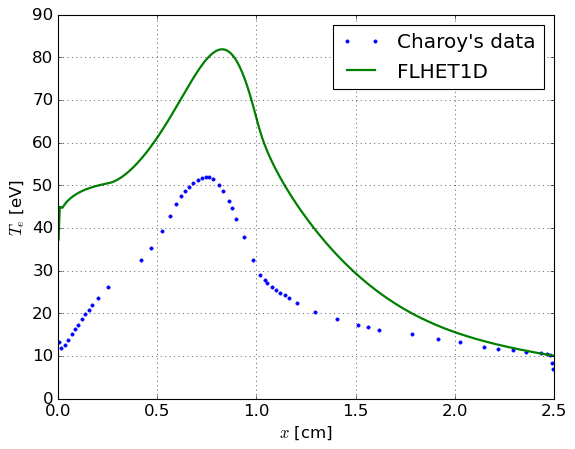

In [38]:
f, ax = plt.subplots()

ax.plot(Te_benchmark[:,0], Te_benchmark[:,1], '.', label="Charoy's data")
ax.plot(x_center*100, P[3,:], '-', label="FLHET1D")

ax.set_xlabel("$x$ [cm]")
ax.set_ylabel("$T_e$ [eV]")

ax.grid()
ax.legend()